# Load Libraries & Data

In [1]:
!wget https://www.spataru.at/students/course_files/week2/adult_rev2.csv

--2023-12-04 13:04:41--  https://www.spataru.at/students/course_files/week2/adult_rev2.csv
Resolving www.spataru.at (www.spataru.at)... 81.19.159.92
Connecting to www.spataru.at (www.spataru.at)|81.19.159.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3595716 (3.4M) [text/csv]
Saving to: ‘adult_rev2.csv’

adult_rev2.csv      100%[===================>]   3.43M  2.80MB/s    in 1.2s    

2023-12-04 13:04:43 (2.80 MB/s) - ‘adult_rev2.csv’ saved [3595716/3595716]



In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap

**Load the data in a variable named df**

Tip: pd.read_csv()




The file path is "adult_rev2.csv"

In [3]:
df = pd.read_csv("adult_rev2.csv")

In [4]:
df

,social_number,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,717703,90,NaN,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,931778,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,176143,66,NaN,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,953541,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,523037,41,Private,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32756,784815,25,Private,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,<=50K
32757,611569,81,Self-emp-inc,10th,6,Married-civ-spouse,Exec-managerial,Wife,White,Female,2936,0,28,United-States,<=50K
32758,967042,55,Private,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,29,United-States,<=50K
32759,991969,47,Private,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,85,United-States,>50K


**How many rows and columns does the data have?**

df.shape > (rows,columns)

In [5]:
df.shape

(32761, 15)

**Show the first 5 rows of the data**

In [6]:
df.tail(1)

,social_number,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32760,868456,19,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K


# Data Cleaning

**Drop the duplicates in the data**

Note: replace the current df (dataframe) with the clean df

In [7]:
df = df.drop_duplicates()

**How many rows are left?**

In [8]:
df.shape

(32589, 15)

**How many values are there in missing in the column workclass?**

In [9]:
df.workclass.value_counts()

Private             22714
Self-emp-not-inc     2544
Local-gov            2094
State-gov            1299
Self-emp-inc         1119
Federal-gov           961
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [10]:
df.workclass.isna().sum()

1837

**Drop all missing values**

Note: replace the current df (dataframe) with the clean df

In [11]:
df = df.dropna()

**How many rows are left?**

In [12]:
df.shape

(30189, 15)

**Is the income column inconsistent? Then fix it**  

In [13]:
df.income.value_counts()

<=50K            21521
>50K              5871
less than 50k     1144
more than 50k      923
over 50k           730
Name: income, dtype: int64

In [14]:
df.loc[df.income == "less than 50k", "income" ] = "<=50K"

In [15]:
df.loc[df.income == "more than 50k", "income" ] = ">50K"

In [16]:
df.loc[df.income == "over 50k", "income" ] = ">50K"

In [17]:
df.income.value_counts()

<=50K    22665
>50K      7524
Name: income, dtype: int64

**Drop social number. How many column are there left?**

Note: Replace the old dataframe with the new clean one

In [18]:
df = df.drop("social_number", axis=1)
# df.drop(columns="social_number")

# Exploratory Data Analysis

## Univariate

**Describe Age**

In [19]:
df.age.describe()

count    30189.000000
mean        38.441949
std         13.135234
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [20]:
df.age.mean()

38.4419490542913

In [21]:
df.age.min()

17

In [22]:
df.age.median()

37.0

**Determine the mean of the column "hours.per.week"**

In [23]:
df.hours_per_week.mean()

40.93143197853523

**What is the diference between mean and median on capital gain?**

In [24]:
df.capital_gain.mean() - df.capital_gain.median()

1092.778859849614

**How many unique workclasses?**

In [26]:
df.workclass.nunique()

7

**How many different types of education are there?**

In [28]:
df.education.value_counts()

HS-grad         9846
Some-college    6685
Bachelors       5052
Masters         1627
Assoc-voc       1307
11th            1049
Assoc-acdm      1009
10th             820
7th-8th          557
Prof-school      542
9th              456
12th             378
Doctorate        376
5th-6th          288
1st-4th          151
Preschool         46
Name: education, dtype: int64

**How many people are divorced?**

In [32]:
df.marital_status.value_counts()

Married-civ-spouse       14085
Never-married             9730
Divorced                  4215
Separated                  940
Widowed                    827
Married-spouse-absent      371
Married-AF-spouse           21
Name: marital_status, dtype: int64

**Histogram Age**

<Axes: >

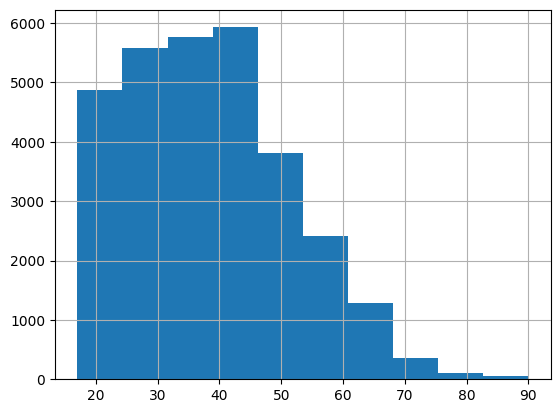

In [33]:
df.age.hist()

**Create a countplot for martial status**

<Axes: >

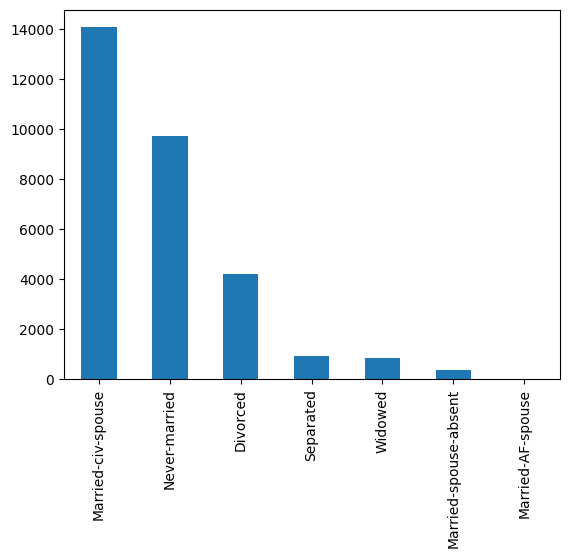

In [35]:
df.marital_status.value_counts().plot.bar()

## Bivariate Analysis

**How many Salesperson make a capital gain of over 80000?**

In [36]:
df[(df.occupation == "Sales") & (df.capital_gain > 80000)].shape

(24, 14)

**How many rows have a capital loss and capital gain bigger than 0?**

In [37]:
df[(df.capital_gain > 0) & (df.capital_loss > 0)].shape

(0, 14)

**Answer: 1**

**Create a feature which combines capital_loss and capital_gain**

In [39]:
df["capital"] = df.capital_gain - df.capital_loss

**What is the mean capital?**

In [40]:
df.capital.mean()

1004.4224055119414

**What is the median capital?**

In [42]:
df.capital.median()

0.0

**How many people have a capital of 0?**

In [44]:
df[df.capital == 0].shape

(26219, 15)

**What is the percentage of people which make a capital gain of over 10000?**

In [45]:
capital_gain = df[df.capital_gain > 10000].shape[0]

In [46]:
total = df.shape[0]

In [47]:
capital_gain/total

0.02434661631720163

**What is the occupation of the biggest capital loss?** Q

Tip: Use min() or max()

In [54]:

df[df.capital == df.capital.min()].occupation

1    Exec-managerial
Name: occupation, dtype: object

**What is the ratio between <=50K income and >50K?**

In [55]:
df.income.value_counts(True)

<=50K    0.75077
>50K     0.24923
Name: income, dtype: float64

**How many people with a income >50K have a
capital loss?**

In [64]:
df[(df.income == ">50K") & (df.capital < 0)].shape[0]

738

**How manydivorced people with a income >50K have a capital gain?**

In [66]:
df[(df.income == ">50K") & (df.capital > 0) & (df.marital_status == "Divorced")].shape[0]

126

**Do a scatter plot between age and capital**

<Axes: xlabel='age', ylabel='capital'>

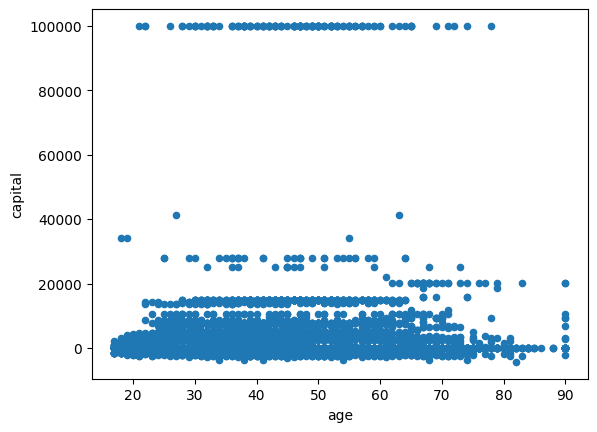

In [67]:
df.plot.scatter("age", "capital")

**This look unreadable. Calculate the average capital by age**

<ipython-input-73-e2d197f6bf6b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


<Axes: xlabel='age', ylabel='capital'>

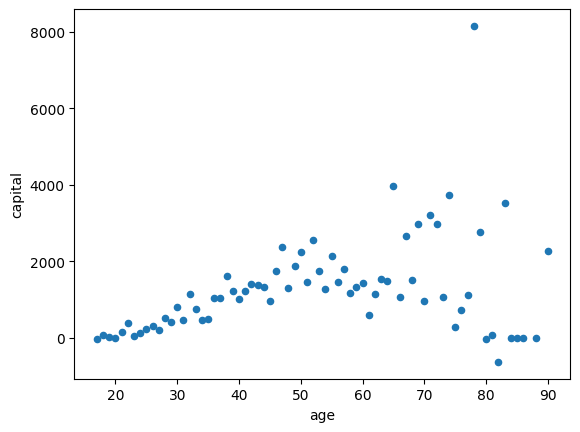

In [73]:
df.groupby("age").mean()["capital"].reset_index().plot.scatter("age", "capital")

In [76]:
df.corr()

<ipython-input-76-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


,age,education_num,capital_gain,capital_loss,hours_per_week,capital
age,1.000000,0.043801,0.080220,0.060161,0.101786,0.076687
education_num,0.043801,1.000000,0.124417,0.079675,0.152776,0.119678
capital_gain,0.080220,0.124417,1.000000,-0.032257,0.080438,0.998520
capital_loss,0.060161,0.079675,-0.032257,1.000000,0.052373,-0.086573
hours_per_week,0.101786,0.152776,0.080438,0.052373,1.000000,0.077327
capital,0.076687,0.119678,0.998520,-0.086573,0.077327,1.000000


**Calculate the correlation on the whole dataframe**

**Do men make more money than women?**